# **Detection Model - YOLOv8**

For Train the object detction model I am using the SOTA object detection model **YOLOv8**

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Yolo_LowLight

/content/drive/MyDrive/Yolo_LowLight


In [ ]:
!nvidia-smi

Mon Apr 17 16:08:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Yolo_LowLight


#### Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/78.2 GB disk)


In [ ]:
# Git clone

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e ultralytics

# from IPython import display
# display.clear_output()
# !yolo mode=checks

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Download Modified Dataset in Roboflow with YOLOv8 text type annotations

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ILLoEbPVZgGijhAaBBpr")
project = rf.workspace("pamudu-ranasinghe-40u8b").project("lowlightyolo")
dataset = project.version(2).download("yolov8")

####Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content/drive/MyDrive/Yolo_LowLight
100% 21.5M/21.5M [00:00<00:00, 89.4MB/s]
Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augme

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
events.out.tfevents.1677051082.84bd959137da.5234.0  train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
results.csv					    weights


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/Yolo_LowLight


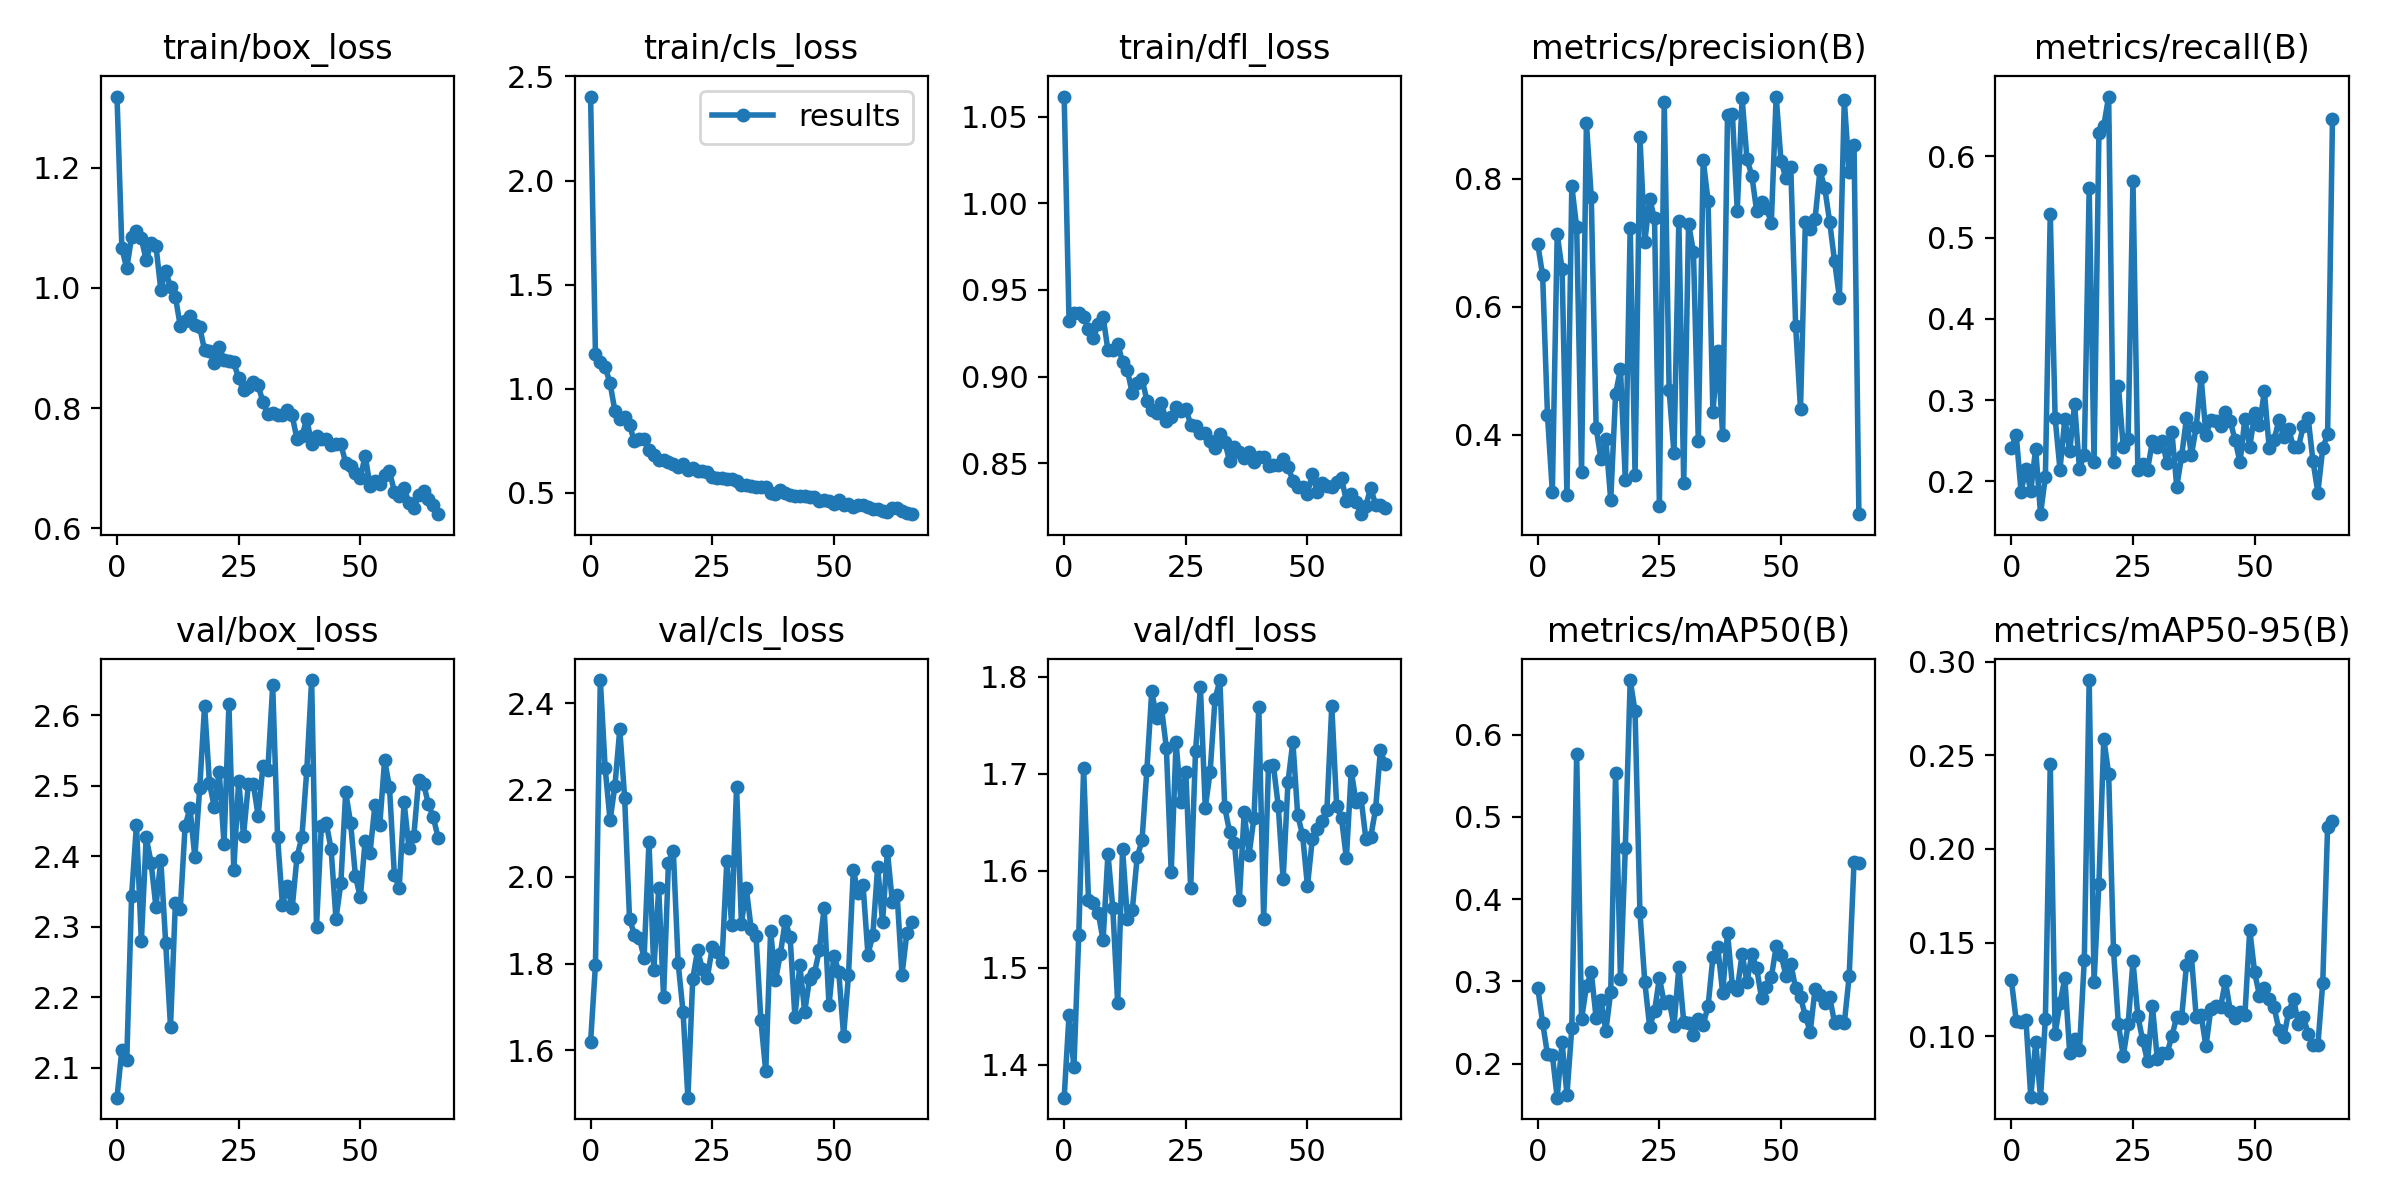

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/Yolo_LowLight


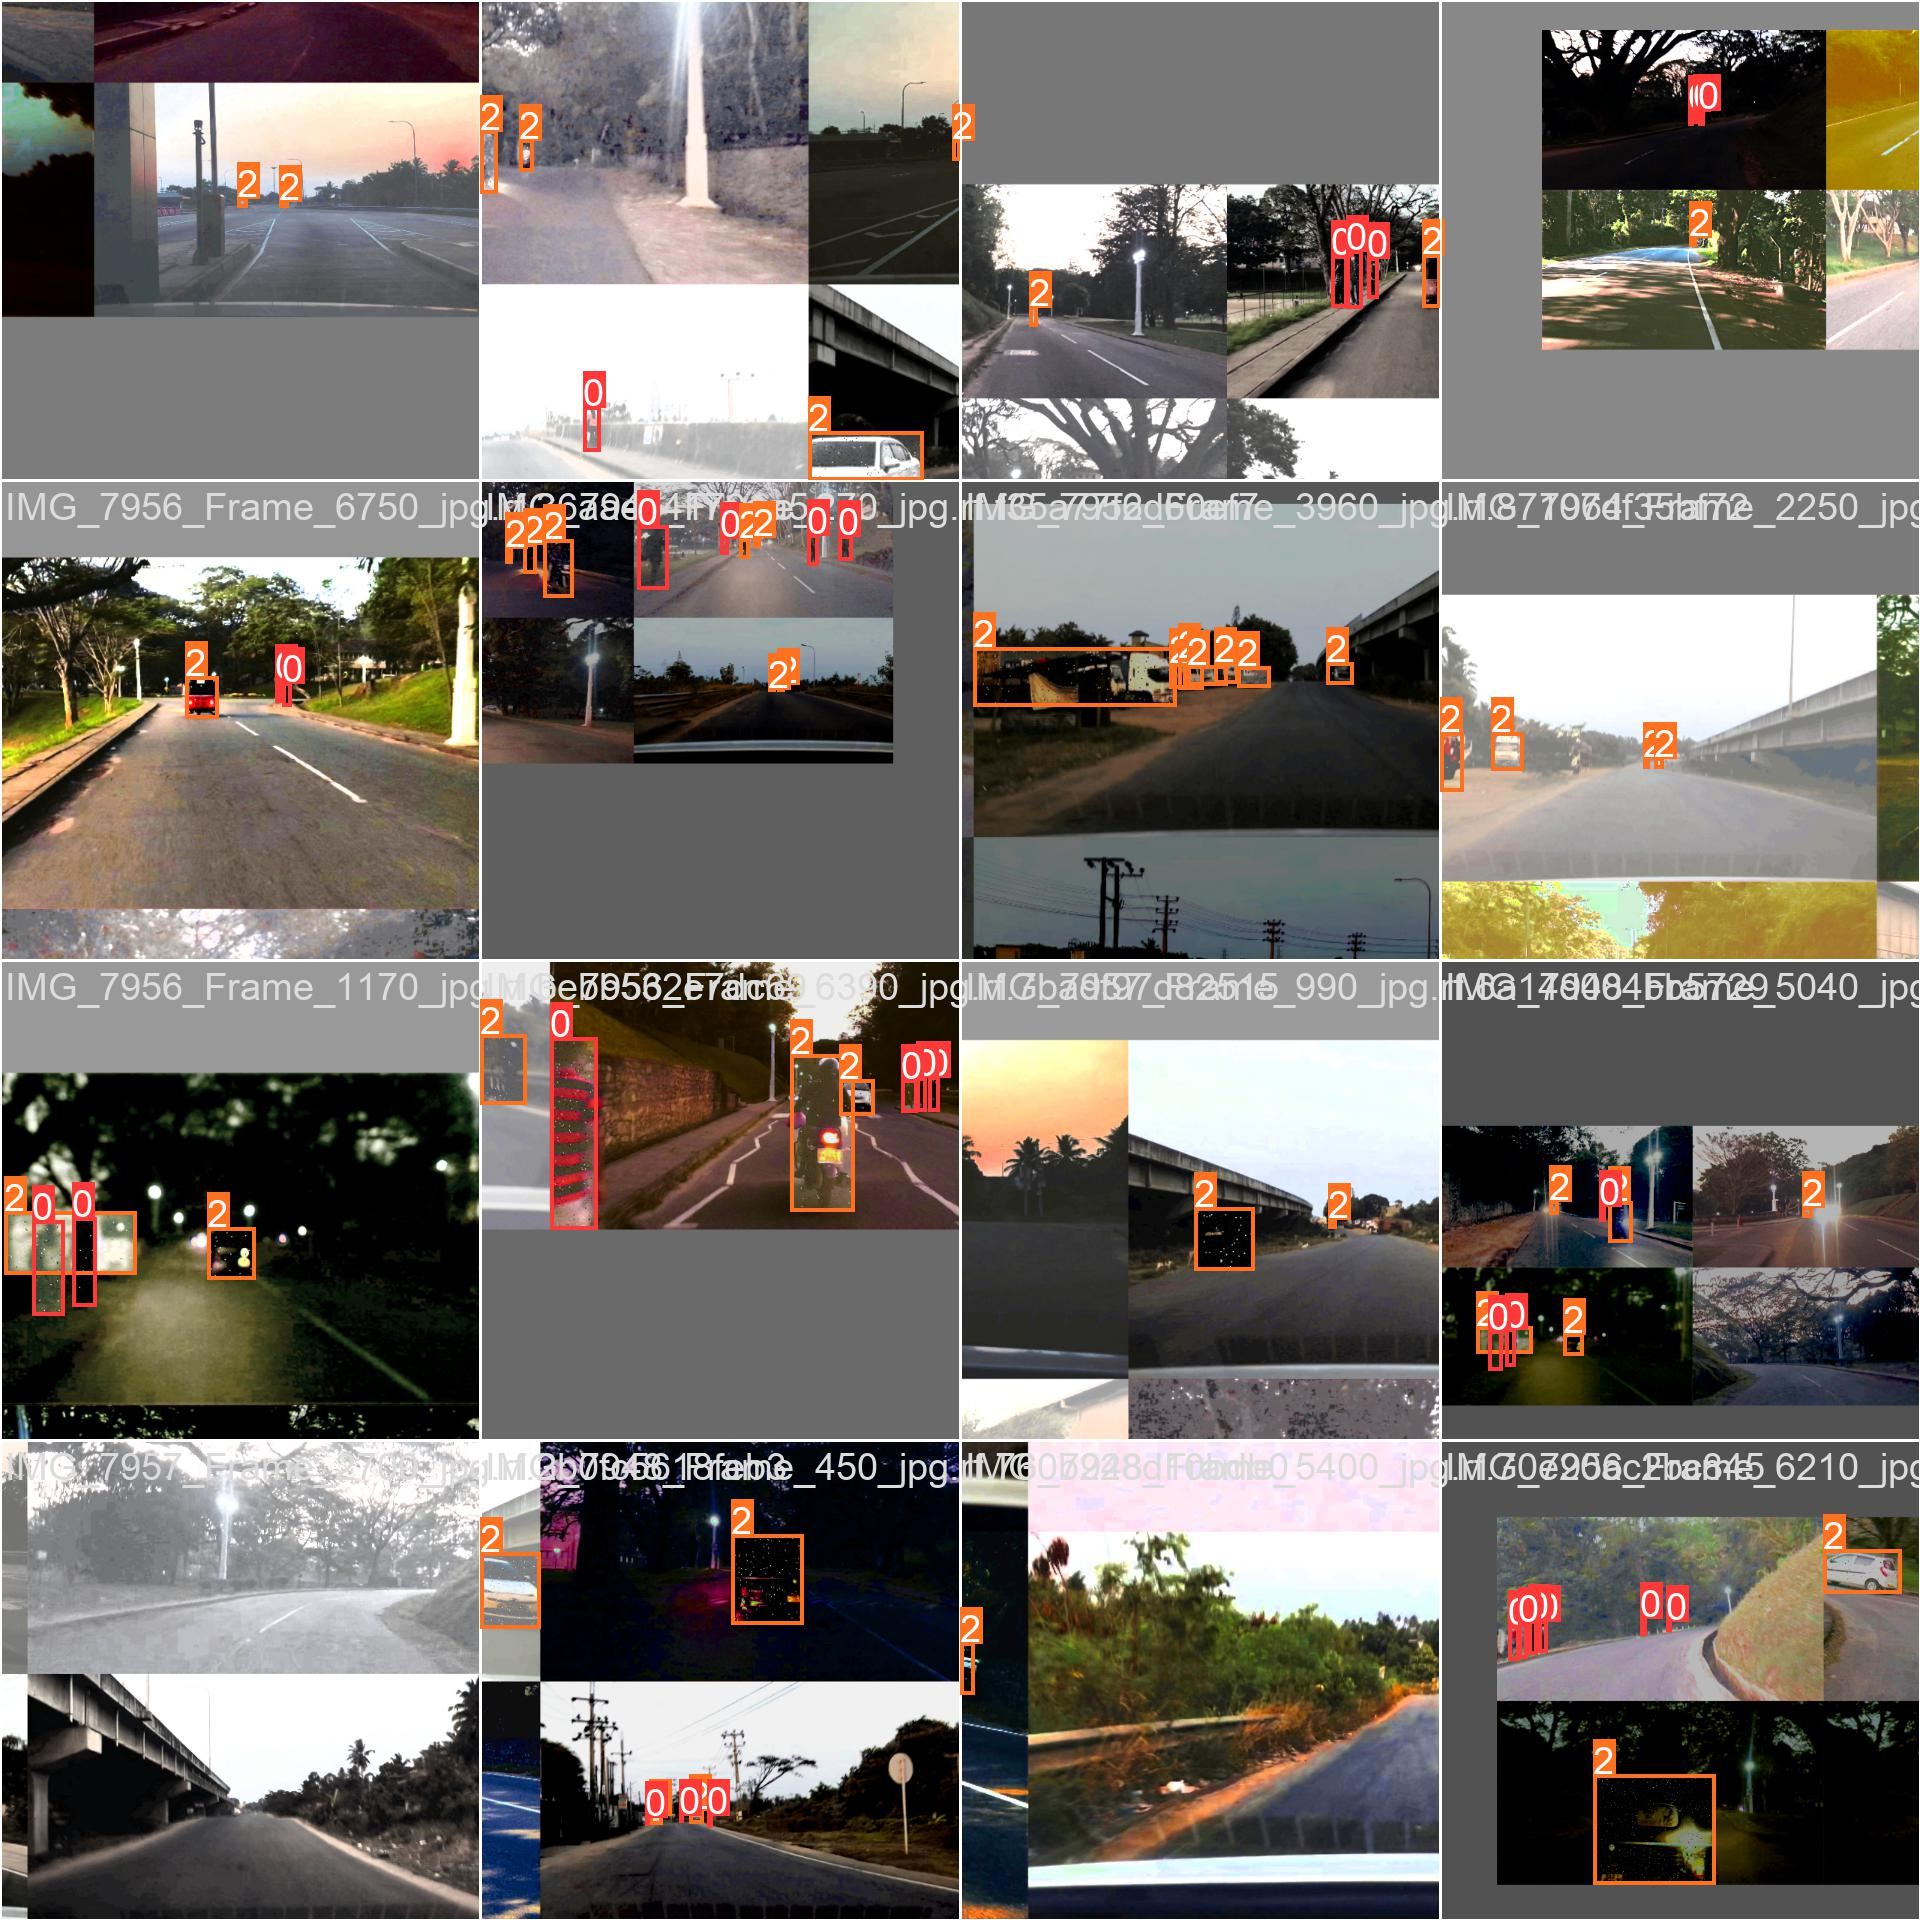

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

#### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/Yolo_LowLight
Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/valid/labels.cache... 21 images, 1 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.33it/s]
                   all         21         57      0.464       0.56      0.551      0.289
                person         21         18      0.279      0.222      0.113     0.0369
                  sign         21          1      0.454          1      0.995      0.597
               vehicle         21         38      0.659      0.459      0.546      0.234
Speed: 0.1ms preprocess, 11.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Yolo_LowLight/data_jetson save=True

/content/drive/MyDrive/Yolo_LowLight
Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/2 (1/243) /content/drive/MyDrive/Yolo_LowLight/data_jetson/Enhance_JETSON_VID_20230417_184833 (1).mp4: 640x384 1 sign, 61.4ms
video 1/2 (2/243) /content/drive/MyDrive/Yolo_LowLight/data_jetson/Enhance_JETSON_VID_20230417_184833 (1).mp4: 640x384 (no detections), 10.8ms
video 1/2 (3/243) /content/drive/MyDrive/Yolo_LowLight/data_jetson/Enhance_JETSON_VID_20230417_184833 (1).mp4: 640x384 (no detections), 10.8ms
video 1/2 (4/243) /content/drive/MyDrive/Yolo_LowLight/data_jetson/Enhance_JETSON_VID_20230417_184833 (1).mp4: 640x384 (no detections), 10.8ms
video 1/2 (5/243) /content/drive/MyDrive/Yolo_LowLight/data_jetson/Enhance_JETSON_VID_20230417_184833 (1).mp4: 640x384 1 vehicle, 10.8ms
video 1/2 (6/243) /content/drive/MyDrive/Yolo_LowLight/data_jetson/Enhance_JETSON_VID_20230417_

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/drive/MyDrive/Yolo_LowLight
Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/22 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/test/images/IMG_7948_Frame_1080_jpg.rf.32c53c8bb98f7899f3d4c3da217f05cc.jpg: 384x640 (no detections), 16.7ms
image 2/22 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/test/images/IMG_7948_Frame_1530_jpg.rf.c93ec0b3328d07ed4c75708dbc03ef79.jpg: 384x640 1 vehicle, 11.6ms
image 3/22 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/test/images/IMG_7948_Frame_1620_jpg.rf.e9104aa8a738421cdd0611e6e9571c5b.jpg: 384x640 (no detections), 11.6ms
image 4/22 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/test/images/IMG_7948_Frame_1800_jpg.rf.8dbdeee46cd1d3483ab1ef59933627ff.jpg: 384x640 1 person, 11.6ms
image 5/22 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/test/images

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/train/images save=True

/content/drive/MyDrive/Yolo_LowLight
Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/522 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/train/images/IMG_7948_Frame_0_jpg.rf.853536bf259f43758bcd8083bd986a1b.jpg: 384x640 4 vehicles, 15.6ms
image 2/522 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/train/images/IMG_7948_Frame_0_jpg.rf.b4cb5bbb122d56f8405bc6f8b7f8c8e6.jpg: 384x640 3 vehicles, 11.5ms
image 3/522 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/train/images/IMG_7948_Frame_0_jpg.rf.cc70ed036bc90713125f307fc5f13289.jpg: 384x640 4 vehicles, 11.5ms
image 4/522 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/train/images/IMG_7948_Frame_1170_jpg.rf.07112a056aa195aaeac63e7c435edab9.jpg: 384x640 (no detections), 11.6ms
image 5/522 /content/drive/MyDrive/Yolo_LowLight/datasets/LowLightYolo-2/train/images/

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/train/images save=True

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/train/images save=True

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Mirnet/videos save=True

/content/drive/MyDrive/Yolo_LowLight
Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/9 (1/20) /content/drive/MyDrive/Mirnet/videos/test.mov: 384x640 (no detections), 15.9ms
video 1/9 (2/20) /content/drive/MyDrive/Mirnet/videos/test.mov: 384x640 (no detections), 11.5ms
video 1/9 (3/20) /content/drive/MyDrive/Mirnet/videos/test.mov: 384x640 (no detections), 11.5ms
video 1/9 (4/20) /content/drive/MyDrive/Mirnet/videos/test.mov: 384x640 (no detections), 11.5ms
video 1/9 (5/20) /content/drive/MyDrive/Mirnet/videos/test.mov: 384x640 (no detections), 11.6ms
video 1/9 (6/20) /content/drive/MyDrive/Mirnet/videos/test.mov: 384x640 (no detections), 11.6ms
video 1/9 (7/20) /content/drive/MyDrive/Mirnet/videos/test.mov: 384x640 (no detections), 11.6ms
video 1/9 (8/20) /content/drive/MyDrive/Mirnet/videos/test.mov: 384x640 (no detections), 14.5ms
video 1/9 (9/20) /content/

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")